
<h1><center>Business Analytics Report</center></h1>
<h2><center>Cost Optimization Modeling</center></h2>

<h3><center>Laura Lazarescou, John Rodgers, Maysam Mansor and Mel Schwan</center></h3>
<h3><center>April 12, 2021</center></h3>



## **Report Scope and Description**

This business analytics report analyzes our business partner's reported metrics with the aim of predicting y-values for future reporting periods. This report is based on the data provided by our business partner, which included approximately 170,000 instances and 49 factors. The data included numerical, categorical, and string data types. The primary business objective of this study is to minimize total potential cost due to erroneous predictions.

## **Model Objective**

This "Cost Optimization" report shows which machine learning model resulted in the minimal cost to the business. Our objective for the model is to minimize the dollars lost for every false positive classification of our target as well as the cost of false negative classifications. The target item "y" is positively predicted when the value is 1 and it is predicted to be 1. A negative classification has a value of 0 and is predicted to be 0.

When the model falsely identifies a positive record, the cost to the business is \$225. Additionally, when the model falsely identifies a negative target, the business is charged \$35. In each model simulation we found a varying balance of false positives and false negatives.  Our challenge was to minimize the total number of errors or false predictions, while prioritizing false positives, since the cost impact was almost ten times the cost of a false negative.

## **Methodology**

The machine learning pipeline activities consisted of:
- Data cleansing and normalization
- Exploratory data analysis (EDA)
- Model development
- Model tuning
- Prediction and comparison of model performance

Appendix A includes a complete description of the pipeline process. In this evaluation, given our primary objective is to minimize overall cost, we tuned each model to minimize false positive predictions.


## **Results**   

Three types of models were evaluated: Neural Network, XG Boost and Random Forest. These modeling techniques are some of the the most widely used in the analytics community, and are well-suited for large datasets with a number of diverse factors.  In this case, we did not have access to a subject matter expert, so we were unable to eliminate factors based on business relevancy.  However, the models were able to provide high-quality predictions.

Below in Table 1 is a summary of our tuned model performance. The best financial results were produced by the XGBoost model with the lowest overall cost of \$214,280.


| Technique | False Positive | False Negative| Total Cost |
| ----------------- | ------------ | ------------ | ------------ |   
| XGBoost|  	794 |	  1018 |	  \$214,280 |
| Neural Network| 	 671	 |   1859 |	  \$216,040 |
| Random Forest| 	754 |	  1462 |	  \$220,820 | 

<h4><center>Model Results (Table 1)</center></h4>

## **Recommendations**

All models may be useful in different circumstances.  The XGBoost model provides approximately $2000 of cost savings over the Neural Network model. However, it took more than one hour to process, and the Neural Network model was created in approximately five minutes.  Given the cost of labor, and the likelihood that source data will evolve and this model will need to be re-trained, we prefer the Neural Network approach.

It may also be worthwhile to leverage these models and build an ensemble model that could provide even greater cost reduction. The difference in performance between these models is modest, however, the total cost is still more than \$200,000. However, if an ensemble model is created, we recommend it be scripted to run independently since the Random Forest model took three hours to train and would be cost prohibitive to maintain otherwise.  

Finally, with assistance from subject matter experts, we may improve cost reduction by eliminating unnecessary factors.  Simplifying the model frequently improves model performance.  We are open to working with your organization to pursue any of these next steps.



# **Appendix A - Model Design and Development**

## **Data Analytics Approach**

1. Define the goal
2. Obtain the data
3. Clean and enrich the data
5. Create and optimize model(s)
6. Report and interpret results   

## **1. Project Goal**
 
Our objective for all models was to minimize dollars lost by minimizing mis-classification of predictions.  In this case, the cost of mis-predicting a positive value was almost ten times greater than the cost to mis-predict a negative value.  Therefore, our focus was on minimizing false positive results with an eye on false negatives to keep overall cost as low as possible.

When the model falsely identifies a record as a positive, our business is charged \$225. When the model falsely identifies a negative target, our business is charged \$35. 


## **2. Data Description**

The original dataset contained 160,000 records and 49 features with one column to predict = 'y'. This data was split into train and test datasets using an 80/20 split.

Attribute Information:

The last column, labeled "y" is the class label (1 for positive, 0 for negative).
The other column labels are x0 - x49.  
These are all float64 type except for columns x24, x29, x30, x32 and x37 which are object type.

## **3. Clean and Enrich Data Set**

Our EDA began by looking at the types of features we would utilize in our models. We initially looked at the dataset shape and feature type (float64, object, ect.)

The next step was to assess any missing data and estimate the impact it may have on the model's accuracy. Figure 1 shows the percentage by feature of missing data.  Every factor in the dataset contains some amount of missing data.  The quantity of missing data is extremely low for each factor, however it is unusual to see missing data in every factor of a dataset.  The labeled target "y" did not contain missing values.


![](./missing_values.png)

<h4><center>Missing Values by Feature (Figure 1)</center></h4>  




**Imputation**

**Imputation of Numerical Features**

We found that most of the numerical data is normally distributed as shown in Figure 2 for feature "x7". With this knowledge we used the mean of each factor as the imputed value for any missing values.

![](./Histograms.png)

<h4><center>Sample Histogram of Feature x7 (Figure 2)</center></h4>





**Imputations of Categorical Features** 

xFeatures x24, x29 and x30 are categorical. 
x24 is a list of continents
x29 is a list of months
x30 is a list of days of the week
After analyzing these features and the small number of missing values we imputed all missing values to "Unknown".

Once the missing values for object-type factors were imputed, each factor was one-hot encoded which converted it into a number of binary factors indicating the presence or absence of that value.  

Approximately twenty new features were created during the process of one-hot encoding.  The final dataset that was used for modeling contained 160,000 observations or rows and 70 features or columns.


**Feature Importance** 

After all the data was cleaned and enriched we ran our different models to optimize the cost to the business. We determined that XGBoost was the optimal model, based on minimal cost, so we explored feature importance using the permutation importance module of XGBoost. Figure 3 show the top ten features by their importance to the XGBoost model's results.



![](./feature_importance.png)   



<h4><center>Feature Importance for XGBoost Model (Figure 3)</center></h4>   


You can see that the x48 feature is the most impactful. 


## **4. Create and Optimize Models**


### **Tensor Flow Neural Network Model**

For the Neural Network model we began our study with a significant number of layers and nodes.  With experimentation, we found our best model using three layers with 32, 12, 1 nodes per layer.  Using more layers and nodes might cause overfitting or overwhelm the model and fewer layers and nodes might consume a lot more time and reduce accuracy.   In the neural network hyperparameter tuning approach, we used FalsePositives with Early_Stopping to allow the model to continue through its process until it reached the optimal number of epochs with the lowest number of FalsePositives.  Table 2 below shows the final optimization values through 40 epochs for the Neural Network model.

The time to process the neural network model for up to 40 epochs was less than ten minutes.

![](./nn_results.png)

<h4><center>Neural Network Optimized Results (Table 2)</center></h4>


Figure 4 below shows the false positive and negative count over the model epochs run.



![](./final.png)

<h4><center>Neural Network Optimize Results (Figure 4)</center></h4>



### **Extreme Gradient Boosting**

For XGBoost, a base model was created using all of the default parameters.  This model resulted in a predicted cost value of \$1,077,240 on the full dataset as a result of 4,000 False Positives and 2,755 False Negatives.

In an effort to improve performance and develop a model that reduces the value of the cost for prediction errors, RandomizedSearchCV was used to fit 10 combinations of parameters from the options below.  The best-performing model based on a 5-fold cross validation of the training dataset was measured based on the value of AUC. The XGBoost model also utilized AUC in evaluating the test dataset for early stopping.

'max_depth': [6, 10, 15, 20],

'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],

'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],

'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],

'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],

'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],

'gamma': [0, 0.25, 0.5, 1.0],

'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],

'n_estimators': [200]

The hypertuned model resulted in a reduction of \$862,960 to the predicted error cost when compared to the untuned model when predicting the target for the full dataset. The predicted error cost of the hypertuned model is \$214,280 as a result of 794 False Positives and 1018 False Negatives. The parameters associated with the best performing model, based on an AUC value of 0.9823 are:

'max_depth': 20,

'learning_rate': 0.3,

'subsample': 0.9,

'colsample_bytree': 0.8,

'colsample_bylevel': 0.5,

'min_child_weight': 3.0,

'gamma': 0,

'reg_lambda': 10.0,

'n_estimators': 200

The total time to process the XGBoost model through the 10 iterations of 5-fold cross-validation was approximately 1 hour.


### **Random Forest**

The random forest model offers a good balance of processing speed and performance.  In our base model, we used the default model parameters and ten (10) estimators.  Without any hypertuning, this simple approach yielded a total cost value of \$307,700.  This cost was based on 939 False Positives and 2755 False Negatives.

To hypertune the random forest model, we used a randomized approach to selecting from a grid of parameters.  The RandomizedSearchCV was called, choosing from the array of options below:

{'bootstrap': [True, False],   

 'max_depth': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],

 'max_features': ['auto', 'sqrt'],

 'min_samples_leaf': [1, 2, 4],

 'min_samples_split': [2, 5, 10],

 'n_estimators': [10, 100, 500, 1000, 1500]}

With hypertuning, we were able to obtain a cost savings of $86,880 since our total cost was $220,820 based on 754 False Positives and 1462 False Negatives.

The processing time of the full dataset using randomized grid search and these parameters was approximately three (3) hours.

Random Forest is a serious contender in any modeling scenario since it provides good model performance and is easy for business stakeholders to understand.  However, it has the highest cost of processing time among all the three models.

## **6. Results**

Model performance was surprisingly similar.  The difference in cost due to prediction error between the highest and lowest performing models was \$6540 (Table 3). There is a small gain of .027 from our Random Forest results to our XGBoost results.

| Technique | False Positive | False Negative| Total Cost |
| ----------------- | ------------ | ------------ | ------------ |   
| XGBoost|  	794 |	  1018 |	  \$214,280 |
| Neural Network| 	 671	 |   1859 |	  \$216,040 |
| Random Forest| 	754 |	  1462 |	  \$220,820 |  

<h4><center>Model Results (Table 3)</center></h4>


The confusion matrix for XGBoost (Figure 5) shows us that model accuracy is also high.  Even though this is not our primary requirement, it is helpful to see that predictions may be trusted in the greater majority of cases.



![](./confusion_xgb.png)

<h4><center>XGBoost Model Confusion Matrix (Figure 5)</center></h4>



## **7. Next Steps**

Our study confirmed that the Neural Network, XGBoost and Random Forest model results are very similar for this dataset. The choice of model depends on the business priorities. These models could contribute to an ensemble model, however we believe the small improvement in cost reduction may not justify the cost to develop and maintain the model. 

<p style="page-break-after: always;">&nbsp;</p>



# Appendix B - Code

In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate,GRU,Dropout,LeakyReLU
from tensorflow.keras.models import Model
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
import numpy as np
import gzip
from tensorflow.keras import layers 
from tensorflow.keras import initializers
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import locale
import pickle

print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
##########################################################
####         Data Import and Cleaning and Imputation  ####
##########################################################

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Data Import and cleaning

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_project.csv")
#data = pd.read_csv("final_project.csv")

<BarContainer object of 51 artists>

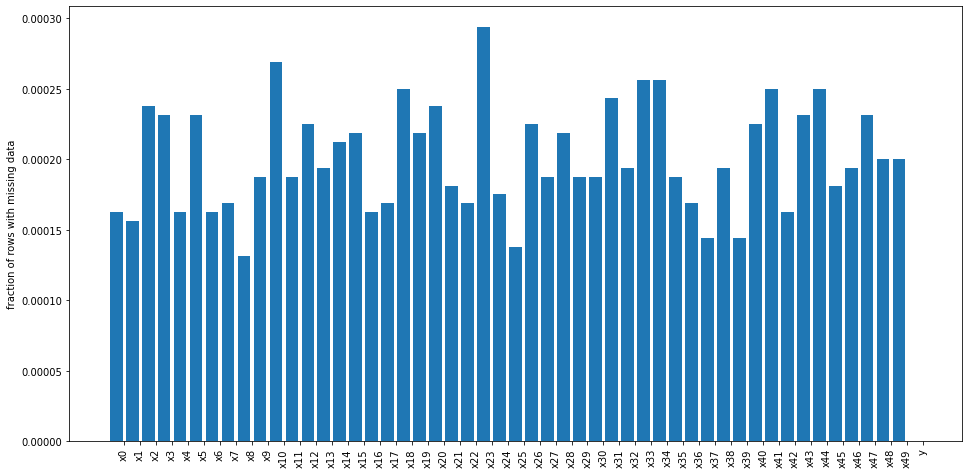

In [8]:
# Graph the number of missing values per feature
null_counts = data.isnull().sum()/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [9]:


print("Top 5 lines\n\n", data.head())
# Count empty values
data.isnull().values.any().sum()
data.isna().values.any().sum()
data = data.dropna()
data.isna().values.any().sum()

print("\n\nShape \n\n", data.shape)

print("\n\nData information \n\n", data.info(verbose=True))

print("\n\nColumns \n\n",data.columns)

print("\n\n Description \n\n",data.describe())
# Feature Engineering
# Delete characters "," and "."  in column x37, x32 and change to numeric
data["x37"]=data["x37"].str.replace('[\$\,\.]', '')
data["x32"]=data["x32"].str.replace('[\%\,\.]', '')
(data["x37"],data["x32"])

data['x37']=pd.to_numeric(data['x37'])
data['x32']=pd.to_numeric(data['x32'])
print("\n\nx37 and x32 column \n\n", data["x37"], data["x37"])
print ("\n\n Data information after x37 and x32 column conversion to integer\n\n",data.info(verbose=True))


# Count null values
data.isnull().sum(axis = 0).sum()
# Discover duplicate values
data.columns.has_duplicates
# Count na if they still exist
data.isna().sum().sum()


Top 5 lines

          x0        x1         x2        x3  ...       x47       x48        x49  y
0 -0.166563 -3.961588   4.621113  2.481908  ... -7.689696  0.151589  -8.040166  0
1 -0.149894 -0.585676  27.839856  4.152333  ... -4.896678 -0.320283  16.719974  0
2 -0.321707 -1.429819  12.251561  6.586874  ... -7.428573 -2.090804  -7.869421  0
3 -0.245594  5.076677 -24.149632  3.637307  ...  5.361375  1.806070  -7.670847  0
4 -0.273366  0.306326 -11.352593  1.676758  ... -0.208351 -0.894942  15.724742  1

[5 rows x 51 columns]


Shape 

 (158392, 51)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  fl

0

In [10]:
# Separate the categoriacla columns from the data and process them later but here just trying to plotting numerical columns
visdf=data[data.columns.difference(['x24','x29','x30'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `fi

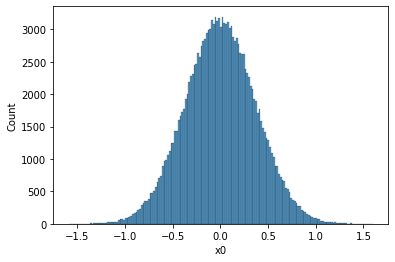

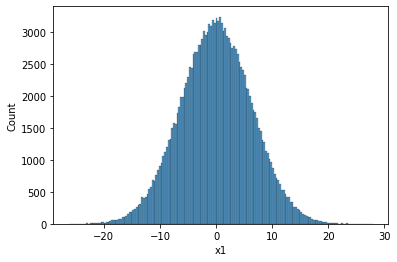

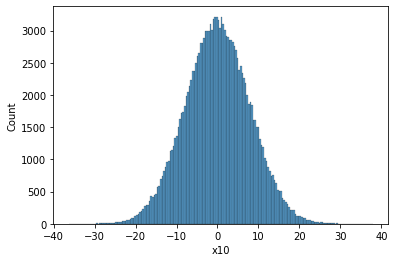

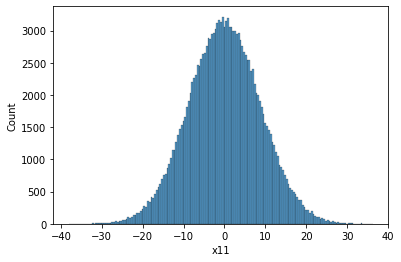

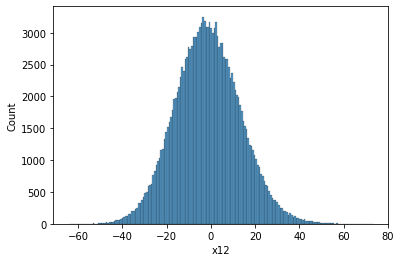

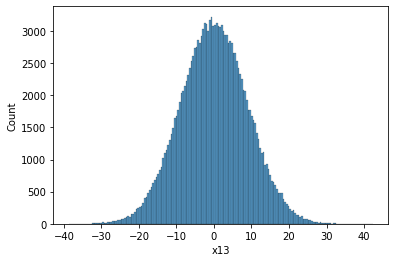

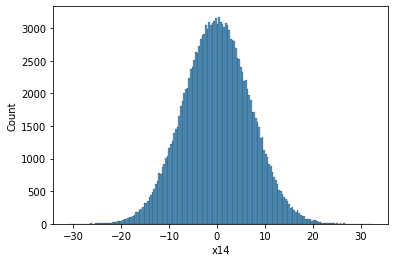

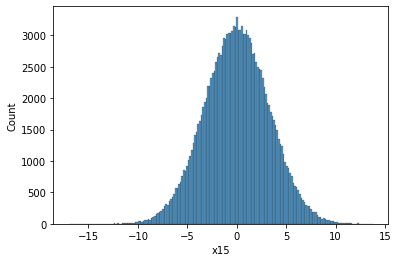

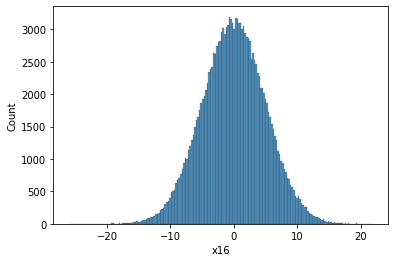

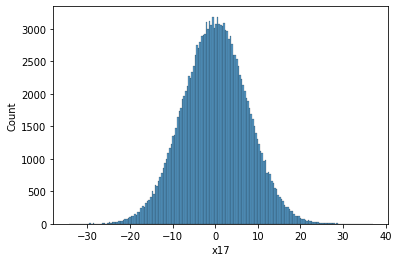

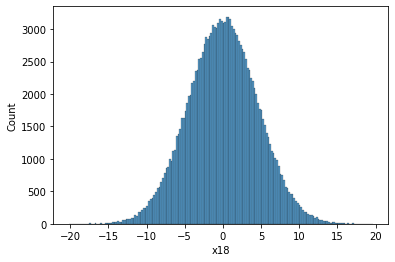

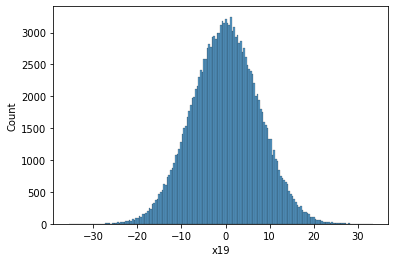

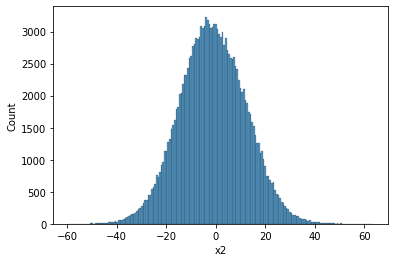

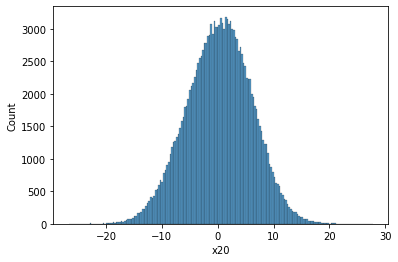

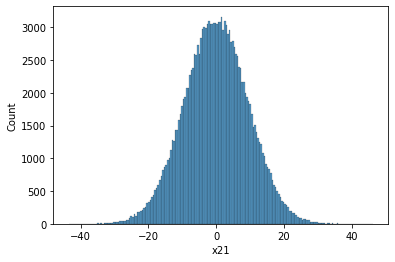

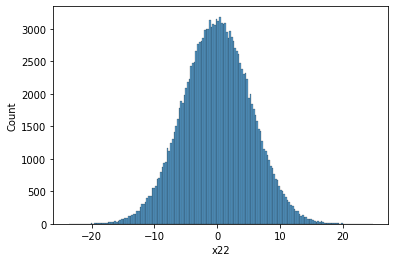

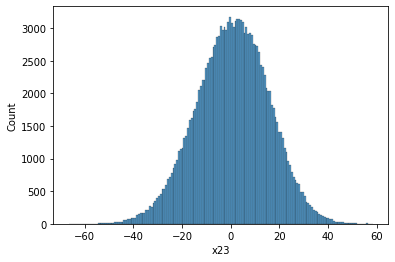

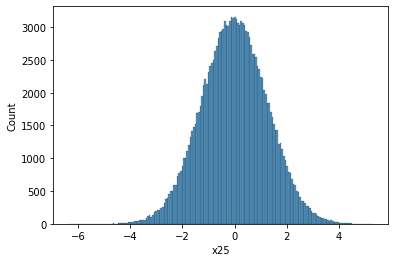

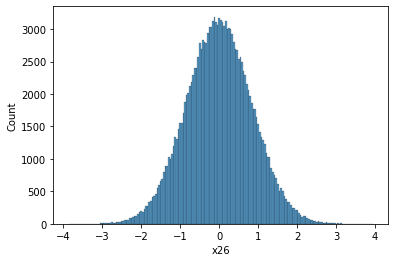

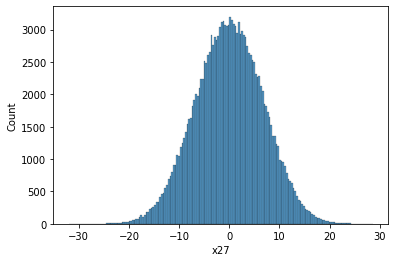

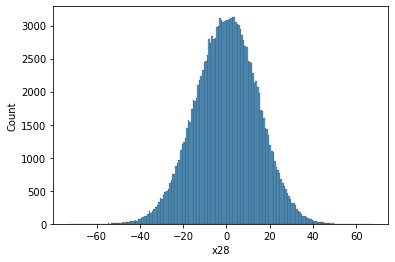

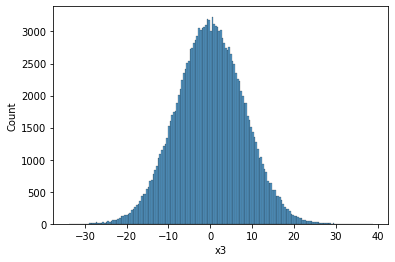

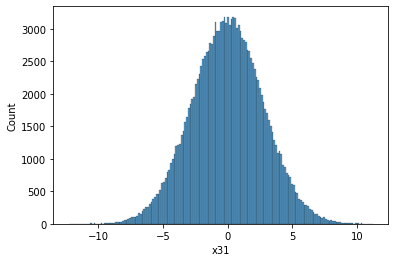

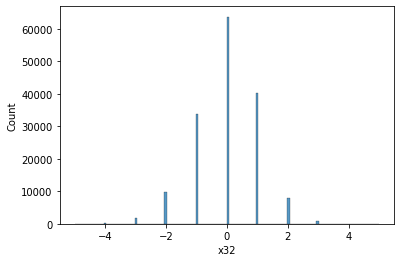

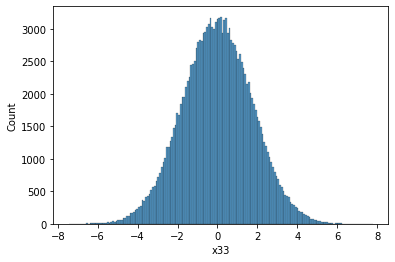

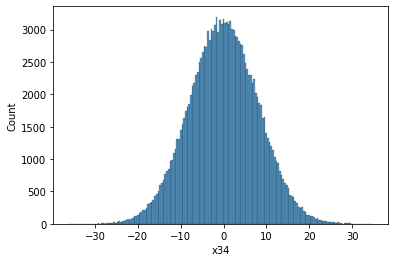

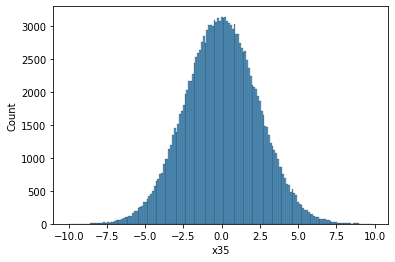

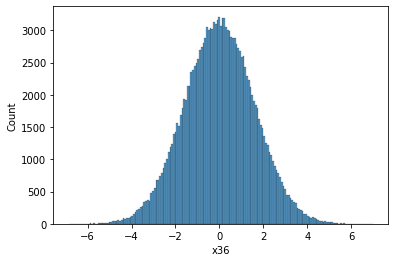

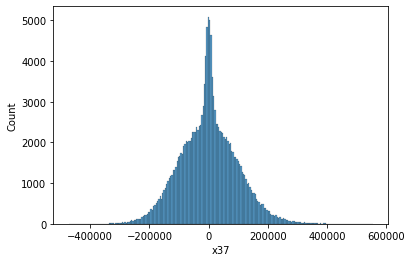

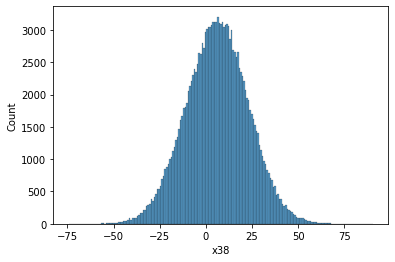

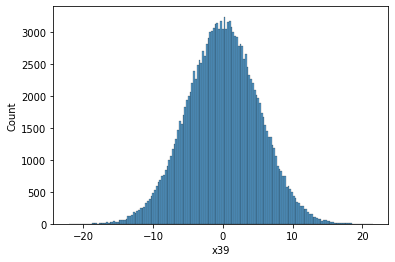

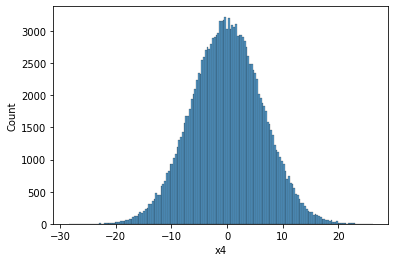

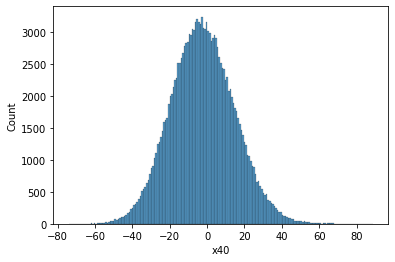

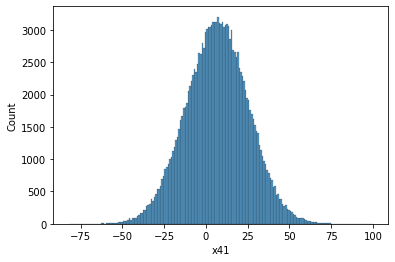

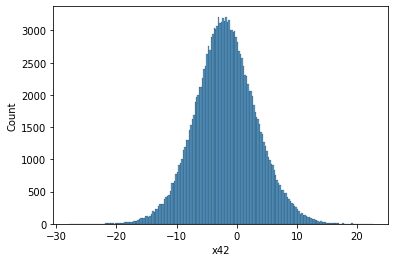

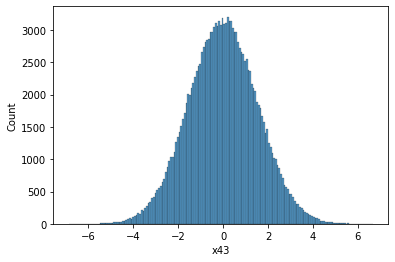

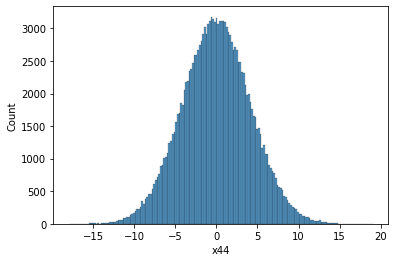

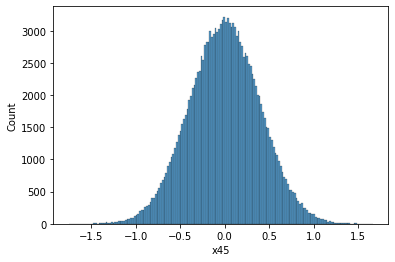

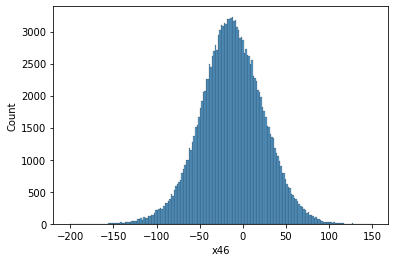

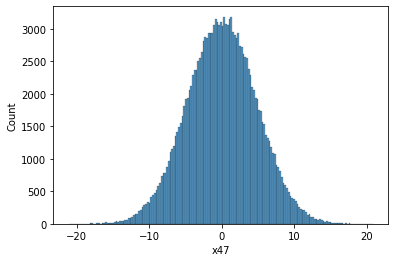

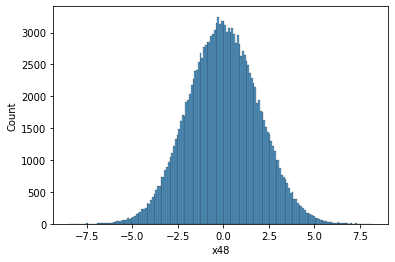

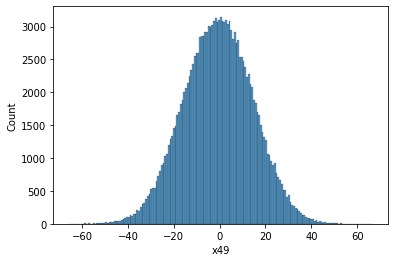

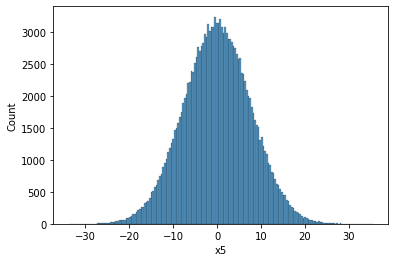

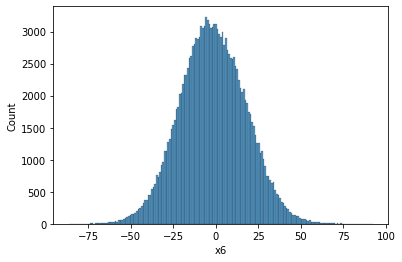

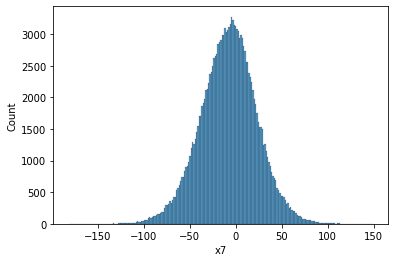

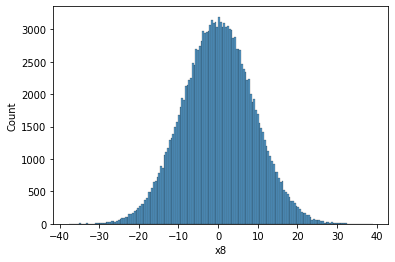

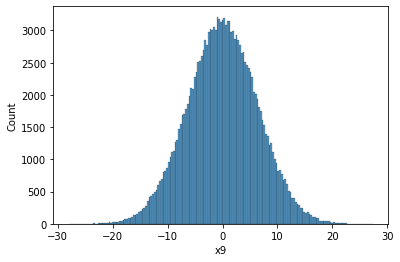

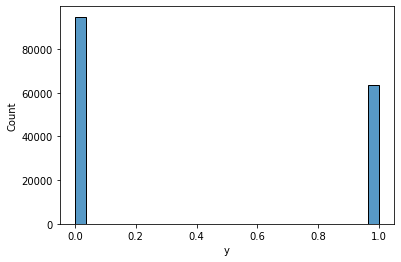

In [11]:
# Visualizations
# Finding out which columns are notmal data and which are not
import seaborn as sns


for i, col in enumerate(visdf.columns):
    plt.figure(i)
    sns.histplot(visdf[col])


In [12]:

# ** Imputations of Numerical Columns ** 
# *****. From the graphs it seems we can use **mean** to impute the missing data from the numerical columns *****
df=visdf.fillna(visdf.mean())

#Testing if there are anymore missing data left behind 
df.isna().sum().sum()

#how data looks lik after imputations 
df.info(verbose=True)
data.columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 48 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x10     158392 non-null  float64
 3   x11     158392 non-null  float64
 4   x12     158392 non-null  float64
 5   x13     158392 non-null  float64
 6   x14     158392 non-null  float64
 7   x15     158392 non-null  float64
 8   x16     158392 non-null  float64
 9   x17     158392 non-null  float64
 10  x18     158392 non-null  float64
 11  x19     158392 non-null  float64
 12  x2      158392 non-null  float64
 13  x20     158392 non-null  float64
 14  x21     158392 non-null  float64
 15  x22     158392 non-null  float64
 16  x23     158392 non-null  float64
 17  x25     158392 non-null  float64
 18  x26     158392 non-null  float64
 19  x27     158392 non-null  float64
 20  x28     158392 non-null  float64
 21  x3      15

,x0,x1,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x2,x20,x21,x22,x23,x25,x26,x27,x28,x3,x31,x32,x33,x34,x35,x36,x37,x38,x39,x4,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x5,x6,x7,x8,x9,y
count,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000,158392.000000
mean,-0.000808,0.003705,0.000816,0.030692,-1.337022,0.005699,0.008887,0.002436,0.006746,0.012607,0.014051,0.021573,-1.148314,0.298973,-0.027341,0.007413,0.726195,-0.001621,-0.001013,-0.003656,0.030159,-0.023012,-0.007546,-0.000953,-0.007019,-0.001261,0.000049,0.006182,143.703640,6.063752,0.003466,-0.000266,-2.318750,6.706030,-1.832959,-0.002174,-0.007254,0.000996,-12.751993,0.028262,0.000160,-0.672052,0.013282,-1.669562,-7.697877,-0.028853,0.004320,0.401195
std,0.371064,6.340297,7.870963,8.767797,14.752763,8.952626,6.964429,3.271402,4.982869,7.570453,4.540760,7.594895,13.274738,5.803957,9.410971,5.412217,14.908566,1.263860,0.843154,6.773700,14.437525,8.066624,2.767239,1.039742,1.747829,8.012550,2.379169,1.592854,95016.637785,16.886960,5.134009,6.383306,17.040216,18.675642,5.110079,1.535282,4.163766,0.396604,36.608634,4.787974,1.935087,15.033134,7.672102,19.300472,30.541562,8.904048,6.354359,0.490142
min,-1.592635,-26.278302,-36.306571,-38.092869,-64.197967,-38.723514,-30.905214,-17.002359,-26.042983,-34.395898,-20.198686,-35.633396,-59.394048,-26.677396,-43.501854,-23.644193,-66.640341,-6.364653,-3.857484,-32.003555,-72.896705,-33.864827,-12.289364,-5.000000,-7.451454,-36.116606,-10.008149,-6.866024,-473454.000000,-74.297559,-22.101647,-28.467536,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,0.000000
25%,-0.251246,-4.259016,-5.286455,-5.902750,-11.383333,-6.030792,-4.695374,-2.207028,-3.343254,-5.070818,-3.054185,-5.105826,-10.166609,-3.605254,-6.360632,-3.649892,-9.260850,-0.853516,-0.566752,-4.596859,-9.700474,-5.453044,-1.875986,-1.000000,-1.184854,-5.403326,-1.610630,-1.068702,-60746.500000,-5.246467,-3.458830,-4.313987,-13.952620,-5.802178,-5.159340,-1.039992,-2.814168,-0.266369,-36.432779,-3.216974,-1.320800,-10.929046,-5.152419,-14.781485,-27.315875,-6.034094,-4.260304,0.000000
50%,-0.001818,0.010023,-0.019074,0.013579,-1.627464,-0.004343,0.003644,0.005473,0.012754,0.024699,0.017192,0.040295,-1.342199,0.432127,-0.016830,0.009153,1.035878,-0.004934,-0.001314,0.035506,0.244454,-0.028470,-0.000218,0.000000,-0.006598,-0.015421,-0.003761,0.004384,-695.500000,6.192058,0.017274,-0.001138,-2.709284,6.847926,-1.922935,-0.004279,-0.012278,0.001841,-12.975088,0.036234,-0.011800,-0.569139,0.015135,-1.951457,-6.959275,-0.016173,0.003098,0.000000
75%,0.248622,4.286606,5.327598,5.933786,8.375380,6.039018,4.702776,2.212473,3.366107,5.102171,3.073832,5.158919,7.878130,4.303770,6.318381,3.672444,11.031540,0.850890,0.567379,4.647103,9.934612,5.448332,1.854836,1.000000,1.179054,5.411490,1.602599,1.079242,58361.500000,17.424261,3.462758,4.308644,8.972837,19.269855,1.452018,1.033870,2.781096,0.269194,11.445524,3.269134,1.318161,9.649839,5.191172,11.454209,12.215119,5.978646,4.303807,1.000000
max,1.600849,27.988178,37.945583,36.360443,73.279354,42.392177,32.546340,13.782559,21.961123,37.057048,19.652986,33.515550,63.545653,27.814560,46.237503,24.863012,58.490500,5.314169,3.951652,28.645074,67.753845,38.906025,11.247163,5.000000,7.787120,34.841428,9.892426,6.999544,554699.000000,90.467

In [13]:

# *******.  Imputations for Categorical columns. *******
# *** Find categorical columns *** 

catcolumns=data.select_dtypes(include='object')
catcolumns.head(10)

#put the cat_columns into another data frame to process further 
data2=data[['x24','x29','x30']]

data2.info(verbose=True)

#Test it whether it has any missing values 
data2.isna().sum()

# Here we put "Unknown" class for imputation of missing categorical values 

# Reference:https://jamesrledoux.com/code/imputation


# Validate data one more time before seperating target feature
data2.fillna("Unknown",inplace=True)
data2.isna().sum()
data2.info(verbose=True)
data2.columns.has_duplicates




<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   x24     158392 non-null  object
 1   x29     158392 non-null  object
 2   x30     158392 non-null  object
dtypes: object(3)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   x24     158392 non-null  object
 1   x29     158392 non-null  object
 2   x30     158392 non-null  object
dtypes: object(3)
memory usage: 4.8+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


False

In [14]:
# Seperate out your Y value
y=data['y']
print ("\n\n Target value \n\n",y)

df.head()
df.drop(['y'],axis=1,inplace=True)
print ("\n\n Data with target column removed \n\n",data.head())

data_object=data2.select_dtypes(include='object')
data_object.head(5)
print (data_object.head(10))




 Target value 

 0         0
1         0
2         0
3         0
4         1
         ..
159995    1
159996    0
159997    1
159998    0
159999    1
Name: y, Length: 158392, dtype: int64


 Data with target column removed 

          x0        x1         x2        x3  ...       x47       x48        x49  y
0 -0.166563 -3.961588   4.621113  2.481908  ... -7.689696  0.151589  -8.040166  0
1 -0.149894 -0.585676  27.839856  4.152333  ... -4.896678 -0.320283  16.719974  0
2 -0.321707 -1.429819  12.251561  6.586874  ... -7.428573 -2.090804  -7.869421  0
3 -0.245594  5.076677 -24.149632  3.637307  ...  5.361375  1.806070  -7.670847  0
4 -0.273366  0.306326 -11.352593  1.676758  ... -0.208351 -0.894942  15.724742  1

[5 rows x 51 columns]
      x24   x29        x30
0  euorpe  July    tuesday
1    asia   Aug  wednesday
2    asia  July  wednesday
3    asia  July  wednesday
4    asia  July    tuesday
5    asia   Aug  wednesday
6    asia   Jun  wednesday
7    asia   Aug  wednesday
8    asia   May

In [15]:
# One hot encode categorical values
data_object.describe(include='all').loc['unique', :]

hot_encoed_df=pd.get_dummies(data_object)
hot_encoed_df.head()

frames = [df,hot_encoed_df]
df2=pd.concat(frames,axis=1)
df2.shape
df2.head()
df2.isna().sum().sum()
df2.columns.has_duplicates




False

In [ ]:
##########################################################
####         Model 1 Neural Network.                  ####
##########################################################

In [ ]:
 # Model 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_train = scaler.fit_transform(df2)
scaled_train
try: 
     tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
     strategy = tf.distribute.TPUStrategy(tpu)
except ValueError: # detect GPUs
     strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
# strategy = tf.distribute.get_strategy() # default strategy that works on CPU and single GPU
print("Number of accelerators: ", strategy.num_replicas_in_sync)

AUTO = tf.data.experimental.AUTOTUNE

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_train,y, test_size=0.20, random_state=123)

seed = 42
first_layer_init = initializers.RandomNormal(
    mean=0.0, stddev=0.1, seed=seed)
hidden_layer_init = initializers.RandomNormal(
    mean=0.0, stddev=0.05, seed=seed)
output_layer_init = initializers.RandomNormal(
    mean=0.0, stddev=0.001, seed=seed)
weight_decay = 1 * 10**-5
model = tf.keras.Sequential()
model.add(layers.Dense(32,activation='tanh',kernel_initializer=hidden_layer_init,kernel_regularizer=l2(weight_decay)))  # adds a layer with 32 neurons, tanh activation
model.add(layers.Dense(12,activation='tanh',kernel_initializer=hidden_layer_init,kernel_regularizer=l2(weight_decay)))  # adds a layer with 12 neurons, tanh activation
model.add(layers.Dense(1, activation='sigmoid',kernel_initializer=output_layer_init,kernel_regularizer=l2(weight_decay)))  # adds a layer with 1 neurons, sigmoid activation

auc_score = tf.keras.metrics.AUC() # define AUC score for model output

model.compile(optimizer=optimizers.SGD(lr=.05), loss='binary_crossentropy', metrics=['accuracy',auc_score,tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()]) # optimized with SGD with a learning rate of .05from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

callbacks = [EarlyStopping(patience=5, monitor='val_false_positives', min_delta=0.00001)]  # stop model after 2 epochs with no improvement based on epoch accuracy 

model.fit(x_train, y_train, epochs=40, validation_data=(x_test,y_test), batch_size=30,callbacks=callbacks)



INFO:tensorflow:Initializing the TPU system: grpc://10.51.243.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.51.243.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of accelerators:  8
Epoch 1/40
4224/4224 [==============================] - 109s 26ms/step - loss: 0.6597 - accuracy: 0.6125 - auc_1: 0.5760 - false_positives_1: 1672.0821 - false_negatives_1: 22324.3297 - val_loss: 0.5739 - val_accuracy: 0.7049 - val_auc_1: 0.7570 - val_false_positives_1: 3523.0000 - val_false_negatives_1: 5827.0000


Epoch 2/40
4224/4224 [==============================] - 107s 25ms/step - loss: 0.5719 - accuracy: 0.7039 - auc_1: 0.7567 - false_positives_1: 7413.5344 - false_negatives_1: 11307.5950 - val_loss: 0.5455 - val_accuracy: 0.7126 - val_auc_1: 0.7845 - val_false_positives_1: 3170.0000 - val_false_negatives_1: 5935.0000


Epoch 3/40
4224/4224 [==============================] - 107s 25ms/step - loss: 0.5227 - accuracy: 0.7365 - auc_1: 0.8039 - false_positives_1: 6333.9877 - false_negatives_1: 9849.9347 - val_loss: 0.4123 - val_accuracy: 0.8185 - val_auc_1: 0.8918 - val_false_positives_1: 2415.0000 - val_false_negatives_1: 3334.0000


Epoch 4/40
4224/4224 [==============================] - 107s 25ms/step - loss: 0.4131 - accuracy: 0.8166 - auc_1: 0.8878 - false_positives_1: 4951.9049 - false_negatives_1: 6479.4298 - val_loss: 0.4237 - val_accuracy: 0.7987 - val_auc_1: 0.9179 - val_false_positives_1: 780.0000 - val_false_negatives_1: 5597.0000


Epoch 5/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.3644 - accuracy: 0.8422 - auc_1: 0.9148 - false_positives_1: 4530.0750 - false_negatives_1: 5359.3425 - val_loss: 0.3318 - val_accuracy: 0.8587 - val_auc_1: 0.9304 - val_false_positives_1: 2353.0000 - val_false_negatives_1: 2122.0000


Epoch 6/40
4224/4224 [==============================] - 107s 25ms/step - loss: 0.3401 - accuracy: 0.8528 - auc_1: 0.9261 - false_positives_1: 4323.5328 - false_negatives_1: 4907.0902 - val_loss: 0.3669 - val_accuracy: 0.8378 - val_auc_1: 0.9355 - val_false_positives_1: 4217.0000 - val_false_negatives_1: 921.0000


Epoch 7/40
4224/4224 [==============================] - 107s 25ms/step - loss: 0.3223 - accuracy: 0.8628 - auc_1: 0.9340 - false_positives_1: 4127.5879 - false_negatives_1: 4557.5548 - val_loss: 0.3048 - val_accuracy: 0.8699 - val_auc_1: 0.9413 - val_false_positives_1: 2078.0000 - val_false_negatives_1: 2044.0000


Epoch 8/40
4224/4224 [==============================] - 107s 25ms/step - loss: 0.3126 - accuracy: 0.8667 - auc_1: 0.9378 - false_positives_1: 3968.6315 - false_negatives_1: 4403.2949 - val_loss: 0.3056 - val_accuracy: 0.8688 - val_auc_1: 0.9448 - val_false_positives_1: 1320.0000 - val_false_negatives_1: 2835.0000


Epoch 9/40
4224/4224 [==============================] - 108s 25ms/step - loss: 0.3046 - accuracy: 0.8699 - auc_1: 0.9412 - false_positives_1: 3922.6618 - false_negatives_1: 4241.1877 - val_loss: 0.2953 - val_accuracy: 0.8751 - val_auc_1: 0.9470 - val_false_positives_1: 1388.0000 - val_false_negatives_1: 2568.0000


Epoch 10/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.3003 - accuracy: 0.8739 - auc_1: 0.9429 - false_positives_1: 3818.5967 - false_negatives_1: 4147.4888 - val_loss: 0.2892 - val_accuracy: 0.8787 - val_auc_1: 0.9478 - val_false_positives_1: 2052.0000 - val_false_negatives_1: 1791.0000


Epoch 11/40
4224/4224 [==============================] - 102s 24ms/step - loss: 0.2909 - accuracy: 0.8783 - auc_1: 0.9466 - false_positives_1: 3687.1337 - false_negatives_1: 4026.9737 - val_loss: 0.2862 - val_accuracy: 0.8813 - val_auc_1: 0.9488 - val_false_positives_1: 1911.0000 - val_false_negatives_1: 1849.0000


Epoch 12/40
4224/4224 [==============================] - 103s 24ms/step - loss: 0.2840 - accuracy: 0.8821 - auc_1: 0.9491 - false_positives_1: 3585.1702 - false_negatives_1: 3908.0845 - val_loss: 0.2932 - val_accuracy: 0.8763 - val_auc_1: 0.9514 - val_false_positives_1: 2660.0000 - val_false_negatives_1: 1260.0000


Epoch 13/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2787 - accuracy: 0.8840 - auc_1: 0.9511 - false_positives_1: 3470.4639 - false_negatives_1: 3872.3200 - val_loss: 0.2684 - val_accuracy: 0.8889 - val_auc_1: 0.9551 - val_false_positives_1: 1545.0000 - val_false_negatives_1: 1974.0000


Epoch 14/40
4224/4224 [==============================] - 105s 25ms/step - loss: 0.2694 - accuracy: 0.8899 - auc_1: 0.9543 - false_positives_1: 3305.0824 - false_negatives_1: 3674.5517 - val_loss: 0.2614 - val_accuracy: 0.8927 - val_auc_1: 0.9580 - val_false_positives_1: 1825.0000 - val_false_negatives_1: 1574.0000


Epoch 15/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2646 - accuracy: 0.8932 - auc_1: 0.9560 - false_positives_1: 3143.5851 - false_negatives_1: 3642.3366 - val_loss: 0.2630 - val_accuracy: 0.8911 - val_auc_1: 0.9579 - val_false_positives_1: 1286.0000 - val_false_negatives_1: 2164.0000


Epoch 16/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2615 - accuracy: 0.8955 - auc_1: 0.9571 - false_positives_1: 3083.6542 - false_negatives_1: 3534.2462 - val_loss: 0.2654 - val_accuracy: 0.8912 - val_auc_1: 0.9570 - val_false_positives_1: 1206.0000 - val_false_negatives_1: 2240.0000


Epoch 17/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2568 - accuracy: 0.8970 - auc_1: 0.9588 - false_positives_1: 3047.4480 - false_negatives_1: 3463.6092 - val_loss: 0.2487 - val_accuracy: 0.9002 - val_auc_1: 0.9627 - val_false_positives_1: 1080.0000 - val_false_negatives_1: 2080.0000


Epoch 18/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2520 - accuracy: 0.8990 - auc_1: 0.9602 - false_positives_1: 2968.6400 - false_negatives_1: 3430.7903 - val_loss: 0.2535 - val_accuracy: 0.8993 - val_auc_1: 0.9617 - val_false_positives_1: 1888.0000 - val_false_negatives_1: 1303.0000


Epoch 19/40
4224/4224 [==============================] - 105s 25ms/step - loss: 0.2482 - accuracy: 0.9011 - auc_1: 0.9615 - false_positives_1: 2908.0244 - false_negatives_1: 3381.8821 - val_loss: 0.2461 - val_accuracy: 0.9013 - val_auc_1: 0.9652 - val_false_positives_1: 2015.0000 - val_false_negatives_1: 1111.0000


Epoch 20/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2451 - accuracy: 0.9029 - auc_1: 0.9623 - false_positives_1: 2857.3733 - false_negatives_1: 3256.0587 - val_loss: 0.2464 - val_accuracy: 0.9006 - val_auc_1: 0.9633 - val_false_positives_1: 1047.0000 - val_false_negatives_1: 2103.0000


Epoch 21/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2409 - accuracy: 0.9046 - auc_1: 0.9638 - false_positives_1: 2817.1489 - false_negatives_1: 3193.8587 - val_loss: 0.2360 - val_accuracy: 0.9070 - val_auc_1: 0.9656 - val_false_positives_1: 1219.0000 - val_false_negatives_1: 1727.0000


Epoch 22/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2350 - accuracy: 0.9073 - auc_1: 0.9656 - false_positives_1: 2719.7006 - false_negatives_1: 3144.4909 - val_loss: 0.2272 - val_accuracy: 0.9109 - val_auc_1: 0.9682 - val_false_positives_1: 1333.0000 - val_false_negatives_1: 1489.0000


Epoch 23/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2331 - accuracy: 0.9094 - auc_1: 0.9662 - false_positives_1: 2654.9060 - false_negatives_1: 3106.3808 - val_loss: 0.2389 - val_accuracy: 0.9071 - val_auc_1: 0.9681 - val_false_positives_1: 1974.0000 - val_false_negatives_1: 970.0000


Epoch 24/40
4224/4224 [==============================] - 102s 24ms/step - loss: 0.2303 - accuracy: 0.9103 - auc_1: 0.9671 - false_positives_1: 2640.9063 - false_negatives_1: 3027.8310 - val_loss: 0.2514 - val_accuracy: 0.8968 - val_auc_1: 0.9691 - val_false_positives_1: 583.0000 - val_false_negatives_1: 2685.0000


Epoch 25/40
4224/4224 [==============================] - 101s 24ms/step - loss: 0.2257 - accuracy: 0.9124 - auc_1: 0.9685 - false_positives_1: 2566.4918 - false_negatives_1: 2978.0791 - val_loss: 0.2172 - val_accuracy: 0.9169 - val_auc_1: 0.9713 - val_false_positives_1: 987.0000 - val_false_negatives_1: 1646.0000


Epoch 26/40
4224/4224 [==============================] - 101s 24ms/step - loss: 0.2192 - accuracy: 0.9149 - auc_1: 0.9704 - false_positives_1: 2469.7122 - false_negatives_1: 2944.2717 - val_loss: 0.2488 - val_accuracy: 0.8998 - val_auc_1: 0.9717 - val_false_positives_1: 469.0000 - val_false_negatives_1: 2706.0000


Epoch 27/40
4224/4224 [==============================] - 101s 24ms/step - loss: 0.2193 - accuracy: 0.9163 - auc_1: 0.9703 - false_positives_1: 2424.8847 - false_negatives_1: 2886.3917 - val_loss: 0.2197 - val_accuracy: 0.9156 - val_auc_1: 0.9707 - val_false_positives_1: 1512.0000 - val_false_negatives_1: 1162.0000


Epoch 28/40
4224/4224 [==============================] - 101s 24ms/step - loss: 0.2138 - accuracy: 0.9184 - auc_1: 0.9720 - false_positives_1: 2367.0838 - false_negatives_1: 2800.8244 - val_loss: 0.2116 - val_accuracy: 0.9204 - val_auc_1: 0.9732 - val_false_positives_1: 1475.0000 - val_false_negatives_1: 1046.0000


Epoch 29/40
4224/4224 [==============================] - 102s 24ms/step - loss: 0.2089 - accuracy: 0.9211 - auc_1: 0.9731 - false_positives_1: 2308.4963 - false_negatives_1: 2676.2561 - val_loss: 0.2135 - val_accuracy: 0.9199 - val_auc_1: 0.9724 - val_false_positives_1: 972.0000 - val_false_negatives_1: 1566.0000


Epoch 30/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2074 - accuracy: 0.9212 - auc_1: 0.9737 - false_positives_1: 2289.9529 - false_negatives_1: 2698.6400 - val_loss: 0.2048 - val_accuracy: 0.9227 - val_auc_1: 0.9746 - val_false_positives_1: 1320.0000 - val_false_negatives_1: 1130.0000


Epoch 31/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2038 - accuracy: 0.9237 - auc_1: 0.9744 - false_positives_1: 2222.0251 - false_negatives_1: 2626.9311 - val_loss: 0.2093 - val_accuracy: 0.9205 - val_auc_1: 0.9759 - val_false_positives_1: 1702.0000 - val_false_negatives_1: 817.0000


Epoch 32/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.2006 - accuracy: 0.9244 - auc_1: 0.9753 - false_positives_1: 2175.8959 - false_negatives_1: 2577.8542 - val_loss: 0.2039 - val_accuracy: 0.9215 - val_auc_1: 0.9754 - val_false_positives_1: 827.0000 - val_false_negatives_1: 1659.0000


Epoch 33/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.1964 - accuracy: 0.9275 - auc_1: 0.9761 - false_positives_1: 2113.1964 - false_negatives_1: 2494.2873 - val_loss: 0.1915 - val_accuracy: 0.9286 - val_auc_1: 0.9774 - val_false_positives_1: 983.0000 - val_false_negatives_1: 1280.0000


Epoch 34/40
4224/4224 [==============================] - 107s 25ms/step - loss: 0.1961 - accuracy: 0.9273 - auc_1: 0.9761 - false_positives_1: 2080.2133 - false_negatives_1: 2500.6551 - val_loss: 0.1955 - val_accuracy: 0.9275 - val_auc_1: 0.9768 - val_false_positives_1: 1190.0000 - val_false_negatives_1: 1107.0000


Epoch 35/40
4224/4224 [==============================] - 104s 25ms/step - loss: 0.1952 - accuracy: 0.9273 - auc_1: 0.9766 - false_positives_1: 2085.1893 - false_negatives_1: 2475.1337 - val_loss: 0.1903 - val_accuracy: 0.9304 - val_auc_1: 0.9777 - val_false_positives_1: 953.0000 - val_false_negatives_1: 1251.0000


Epoch 36/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.1902 - accuracy: 0.9295 - auc_1: 0.9778 - false_positives_1: 2055.5792 - false_negatives_1: 2405.4514 - val_loss: 0.1894 - val_accuracy: 0.9322 - val_auc_1: 0.9779 - val_false_positives_1: 934.0000 - val_false_negatives_1: 1214.0000


Epoch 37/40
4224/4224 [==============================] - 107s 25ms/step - loss: 0.1888 - accuracy: 0.9313 - auc_1: 0.9781 - false_positives_1: 2025.2159 - false_negatives_1: 2362.9778 - val_loss: 0.2008 - val_accuracy: 0.9244 - val_auc_1: 0.9778 - val_false_positives_1: 635.0000 - val_false_negatives_1: 1760.0000


Epoch 38/40
4224/4224 [==============================] - 105s 25ms/step - loss: 0.1877 - accuracy: 0.9310 - auc_1: 0.9783 - false_positives_1: 1992.3794 - false_negatives_1: 2365.1082 - val_loss: 0.1859 - val_accuracy: 0.9322 - val_auc_1: 0.9795 - val_false_positives_1: 693.0000 - val_false_negatives_1: 1456.0000


Epoch 39/40
4224/4224 [==============================] - 106s 25ms/step - loss: 0.1831 - accuracy: 0.9333 - auc_1: 0.9793 - false_positives_1: 1955.2826 - false_negatives_1: 2299.5938 - val_loss: 0.1926 - val_accuracy: 0.9287 - val_auc_1: 0.9797 - val_false_positives_1: 547.0000 - val_false_negatives_1: 1712.0000


Epoch 40/40
4224/4224 [==============================] - 107s 25ms/step - loss: 0.1822 - accuracy: 0.9350 - auc_1: 0.9796 - false_positives_1: 1917.4911 - false_negatives_1: 2256.8551 - val_loss: 0.1826 - val_accuracy: 0.9338 - val_auc_1: 0.9798 - val_false_positives_1: 1011.0000 - val_false_negatives_1: 1087.0000


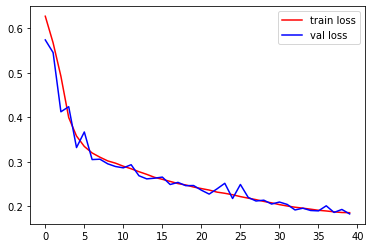

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                2176      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                396       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 2,585
Trainable params: 2,585
Non-trainable params: 0
_________________________________________________________________


,loss,accuracy,auc_1,false_positives_1,false_negatives_1,val_loss,val_accuracy,val_auc_1,val_false_positives_1,val_false_negatives_1
0,0.627154,0.646051,0.673559,6830.0,38020.0,0.573894,0.704852,0.757008,3523.0,5827.0
1,0.567375,0.705815,0.761462,14818.0,22459.0,0.545456,0.712586,0.784453,3170.0,5935.0
2,0.492175,0.760214,0.831897,12000.0,18384.0,0.412275,0.818523,0.891757,2415.0,3334.0
3,0.399346,0.824035,0.896188,9796.0,12501.0,0.423732,0.798699,0.917932,780.0,5597.0
4,0.357771,0.846117,0.918035,8997.0,10502.0,0.331792,0.858739,0.930372,2353.0,2122.0
5,0.334351,0.856763,0.928747,8512.0,9638.0,0.366871,0.837811,0.935511,4217.0,921.0
6,0.319715,0.863447,0.934992,8225.0,9078.0,0.304823,0.869882,0.941340,2078.0,2044.0
7,0.310161,0.867606,0.938951,8010.0,8766.0,0.305638,0.868841,0.944787,1320.0,2835.0
8,0.301833,0.872168,0.942309,7771.0,8427.0,0.295271,0.875122,0.947024,1388.0,2568.0
9,0.296685,0.875459,0.944346,7545.0,8236.0,0.289192,0.878689,0.947795,2052.0,1791.0


In [ ]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
plt.plot(train_loss,color='red', label='train loss')
plt.plot(val_loss,color='blue', label='val loss')
plt.legend()
plt.show()

model.summary()

pd.DataFrame(model.history.history)

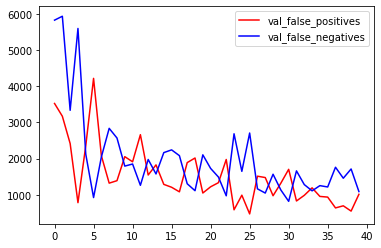

In [ ]:
val_FP = model.history.history['val_false_positives_1']
val_FN = model.history.history['val_false_negatives_1']
plt.plot(val_FP,color='red',label='val_false_positives')
plt.plot(val_FN,color='blue',label='val_false_negatives')
plt.legend()
plt.show()

In [ ]:
##########################################################
####                   XGBoost                        ####
##########################################################




In [19]:
# Create test/train split of data
final_df = df2 # Use cleaned and imputated data from data section
x_train, x_test, y_train, y_test = train_test_split(final_df,y, test_size=0.20, random_state=123)

In [20]:
## XGB Parameter grid
param_grid = {
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [200]}

In [21]:
## XGB Model building
# define function to do randomsearch
def xgb_randomsearch(xgb_df, xgb_y, xgb_x_test, xgb_y_test, n_iter, param_grid):
    # intiate XGBoost Classifier
    clf = xgb.XGBClassifier(use_label_encoder=False)
    # RandomSearchCV with custom scoring function
    xgb_rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=n_iter, n_jobs=-1, verbose=2,cv=5, refit=True, random_state=123, scoring='roc_auc')
    # return fit model
    fit_params = {'early_stopping_rounds':50, 'eval_set':[[xgb_x_test,xgb_y_test]], 'eval_metric':'auc'}
    return xgb_rs_clf.fit(xgb_df, xgb_y, **fit_params)

In [22]:
## XGB Model Fit
from datetime import datetime
start = datetime.now()
print(f'start time: {start}')
xgb_clf = xgb_randomsearch(xgb_df=x_train, xgb_y=y_train, xgb_x_test=x_test, xgb_y_test=y_test, n_iter=10, param_grid=param_grid)
end = datetime.now()
print(f'end time: {end}')
print(f'total time(m): {end-start}')

start time: 2021-04-12 12:17:54.811640
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 94.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 109.8min finished


[0]	validation_0-auc:0.892483
Will train until validation_0-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.932696
[2]	validation_0-auc:0.949706
[3]	validation_0-auc:0.956148
[4]	validation_0-auc:0.960744
[5]	validation_0-auc:0.964273
[6]	validation_0-auc:0.966017
[7]	validation_0-auc:0.96825
[8]	validation_0-auc:0.970722
[9]	validation_0-auc:0.972401
[10]	validation_0-auc:0.973797
[11]	validation_0-auc:0.974928
[12]	validation_0-auc:0.975898
[13]	validation_0-auc:0.976998
[14]	validation_0-auc:0.977888
[15]	validation_0-auc:0.97843
[16]	validation_0-auc:0.979111
[17]	validation_0-auc:0.979393
[18]	validation_0-auc:0.9797
[19]	validation_0-auc:0.980013
[20]	validation_0-auc:0.980227
[21]	validation_0-auc:0.980468
[22]	validation_0-auc:0.980698
[23]	validation_0-auc:0.980758
[24]	validation_0-auc:0.980715
[25]	validation_0-auc:0.98067
[26]	validation_0-auc:0.980968
[27]	validation_0-auc:0.980958
[28]	validation_0-auc:0.98117
[29]	validation_0-auc:0.981319
[30]	validation_0-auc:

In [23]:
xgb_clf.cv_results_

{'mean_fit_time': array([259.62258763, 318.32708993, 122.6055253 , 149.1768312 ,
        486.81900897, 390.34630032, 353.35170884, 280.56320696,
        146.02923722, 102.53373694]),
 'mean_score_time': array([0.79429202, 1.91519499, 1.10696845, 1.40457764, 3.05394487,
        1.76340699, 1.2852448 , 1.24809475, 1.11367536, 0.37092886]),
 'mean_test_score': array([0.93871262, 0.97167068, 0.97734763, 0.95452596, 0.98199754,
        0.98202057, 0.96821098, 0.96535591, 0.97841496, 0.90395791]),
 'param_colsample_bylevel': masked_array(data=[1.0, 0.6, 0.4, 0.4, 0.5, 0.5, 0.9, 0.9, 0.4, 0.5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_colsample_bytree': masked_array(data=[0.6, 0.6, 0.5, 0.5, 0.8, 0.8, 0.7, 0.6, 0.6, 0.9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
          

In [33]:
# predict value for y on whole data set
xgb_pred = xgb_clf.predict(final_df)

In [34]:
### XGB True Cost of FP and FN

# create a custom cost function 
def cost_function(y_actual, y_pred):
    CM = confusion_matrix(y_actual, y_pred)
    FP = CM[0][1]
    FN = CM[1][0]
    Cost = (FP*225)+(FN*35)
    return CM, FP, FN, Cost

In [35]:
# use custom cost function to find total cost
CM, FP, FN, cost = cost_function(y, xgb_pred)

In [ ]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US')
print(f'False Positives: {FP}')
print(f'False Negatives: {FN}')
print(f'Total Cost: {locale.currency(cost, grouping=True)}')

In [36]:
### XGB Confusion Matrix

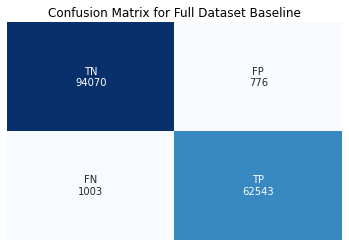

In [38]:
group_names = ['TN','FP','FN','TP']
group_counts = CM.flatten()
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
matrix = sns.heatmap(CM, annot=labels, fmt='',cmap='Blues',cbar=False, xticklabels=False, yticklabels=False).set_title("Confusion Matrix for Full Dataset Baseline")

In [40]:
from sklearn.metrics import mean_squared_error as MSE
xgb_rmse = np.sqrt(MSE(y, xgb_pred))
xgb_accuracy = accuracy_score(y, xgb_pred)

In [41]:
print(xgb_rmse)

0.10597937469146027


In [ ]:
### Feature Importance
from sklearn.inspection import permutation_importance

# use permutation_importance() to calculate feature importance of fitted model against test dataset
perm_importance = permutation_importance(xgb_clf, x_test, y_test, n_repeats=30, random_state=123)

# Get top 10 features based on importance
feature_importance = pd.DataFrame(perm_importance.importances_mean, index=x_test.columns, columns=['importance']).nlargest(10,['importance'])

In [ ]:
# plot feature importance
feature_importance.plot(kind='bar')
plt.xlabel("feature")

In [ ]:
##########################################################
####                 Random Forest                    ####
##########################################################



In [ ]:
import pandas as pd
import xgboost as xgb
import os
import time
import numpy as np
from sklearn.metrics import log_loss, accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import export_graphviz
from pprint import pprint

import math
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt  
from sklearn import model_selection

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import sklearn.feature_selection as fs
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

# Full Dataset used for Base Model.
# Default max_levels is None, so the tree is very large

rf_base = RandomForestClassifier(n_estimators=10, random_state=123 ) 

start = time.time()
rf_base.fit(x_train, y_train)

end = time.time()
rf_base_time=round((end-start),2)
rf_base_time

8.99

In [ ]:
rf_base_preds = rf_base.predict_proba(x_test)

In [ ]:
rf_base_log_loss = log_loss(y_test,rf_base_preds[:,1]) # each column is class probability, 
print(rf_base_log_loss)
rf_base_accuracy = accuracy_score(y_test,np.rint(rf_base_preds[:,1]))
print(rf_base_accuracy)

0.36447004231209096
0.8957037785283627


In [ ]:
# Generate predictions and calculate Confusion Matrix CM
# Set target names for classification report output

y_pred = np.rint(rf_base_preds[:,1])
CM = confusion_matrix(y_test,y_pred)
target_names = ['class 0', 'class 1']

In [ ]:
# RF Model Performance Metrics

print(classification_report(y_test, y_pred, target_names = target_names, digits=4))

              precision    recall  f1-score   support

     class 0     0.8834    0.9511    0.9160     18938
     class 1     0.9180    0.8134    0.8625     12741

    accuracy                         0.8957     31679
   macro avg     0.9007    0.8822    0.8892     31679
weighted avg     0.8973    0.8957    0.8945     31679



In [ ]:
# Evaluate False Positives, False Negatives and Calculate Total Cost

FP = CM[0][1]
FN = CM[1][0]
total_cost = (FP*225)+(FN*35)
print("False Positives =",FP)
print("False Negatives =",FN)
print("Total Cost =",total_cost)

False Positives = 926
False Negatives = 2378
Total Cost = 291580


In [ ]:
#########################################################
#              Begin Hypertuning for Random Forest.     #
#########################################################

In [ ]:
# Citation:  Thank you to Will Koehrsen and Towards Data Science. RF Hypertuning code is borrowed from his example. 
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Note - different from tutorial, we are using rf=RandomForestClassifier(), not RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters Used by Base Model:\n')
pprint(rf_base.get_params())

Parameters Used by Base Model:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# Define Random Grid Parameters and use RandomizedSearchCV to choose 
# different combinations of parameters for different sizes of datasets

#from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10,100,500,1000,1500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 100, 200,300,400,500,600,700,800,900,1000]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print('Random Grid Parameters:\n')
pprint(random_grid)

Random Grid Parameters:

{'bootstrap': [True, False],
 'max_depth': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 100, 500, 1000, 1500]}


In [ ]:
# Adapt variable names for this example
train_features = x_train
train_labels = y_train
test_features = x_test
test_labels = y_test
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (126713, 67)
Training Labels Shape: (126713,)
Testing Features Shape: (31679, 67)
Testing Labels Shape: (31679,)


In [ ]:
# Original Code Commented - Using Pickled Models

# Use the random grid to search for best hyperparameters
# Define estimator - same parameters as base model

rf = RandomForestClassifier(n_estimators=50, random_state=123 )

In [ ]:
# Create the FULL model based on the random_grid parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=123, n_jobs = -1)

In [ ]:
# Commented to prevent running best model - three hour processing time.
# Fit a model on all data using the same random_grid parameters
# rf_random_all = rf_random.fit(train_features, train_labels)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
rf_random_all_preds = rf_random_all.predict_proba(x_test)

In [ ]:
y_all_pred = np.rint(rf_random_all_preds[:,1])
CM = confusion_matrix(y_test,y_all_pred)
target_names = ['class 0', 'class 1']

In [ ]:
# RF Model Performance Metrics

print(classification_report(y_test, y_all_pred, target_names = target_names, digits=4))

In [ ]:
# # Evaluate False Positives, False Negatives and Calculate Total Cost

FP = CM[0][1]
FN = CM[1][0]
total_cost = (FP*225)+(FN*35)
print("False Positives =",FP)
print("False Negatives =",FN)
print("Total Cost =",total_cost)

In [ ]:
## End Random Forest